<a href="https://colab.research.google.com/github/alexc6h6/Image-Classification-CNN/blob/master/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

Convolutional neural network is one of deep neural network which most commonly be applied in image classification, object detecttion, natural language processing and time series analysis. 




# Convolutional layer

Generally, an image have three channels — red, green and blue, each having pixel values in the range 0 to 255.

The primary purpose of a convolution in CNN is to extract features from the input image. Applying a convolution to an image is like running a filter of a certain dimension and sliding it on top of the image. That operation is translated into an element-wise multiplication between the two matrices and finally an addition of the multiplication outputs.


![alt text](https://cdn-images-1.medium.com/max/900/1*7S266Kq-UCExS25iX_I_AQ.png)


The filter moved with a stride of 1 and covered the whole image from edge to edge. However, the output image is shrinking on every convolution and lose some information related to the edge of the image because the pixels on the edges are scanned less by the filter than the pixels within the center of image.

'Same' padding which put the image with zeros all around its border to allow the filter to slide on top and maintain the output size equal to the input. 

![alt text](https://cdn-images-1.medium.com/max/513/1*PBnmjdDqn-OF8JEyRgKm9Q.png)


the formula to calculate the output size, knowing the filter size (f), stride (s), pad (p), and input size (n):

![alt text](https://cdn-images-1.medium.com/max/948/1*rOyHQ2teFXX5rIIFHwYDsg.png)

# Pooling Layers

Max pooling: slide the filter through the input and take the largest element within the region covered by the filter.

Average pooling: retains the average of the values encountered within the filter.


![alt text](https://cdn-images-1.medium.com/max/757/1*voEBfjohEDVRK7RpNvxd-Q.png)





The example of a Convolutional Neural Network:

![alt text](https://cdn-images-1.medium.com/max/900/1*_l-0PeSh3oL2Wc2ri2sVWA.png)

Convolutional neural networks is to have Convolutional layers, one or more, followed by a pooling layer, and then again one or more CONV layers followed by a pooling layer and, at the end, a few FC layers followed by a softmax for classification.

Normally, the deeper into the network, the sizes (nh, nw) decrease, while the number of channels (nc) increases. For each filter  in convolutional layers that detect certain pattern to extract the features from the images.



In [24]:

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

print(tf.__version__)

2.2.0


In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install --upgrade tensorflow

# MNIST

MNIST dataset, which is a digit recognition would be loading for CNN classification.

![alt text](https://www.researchgate.net/profile/Guy_Mayraz/publication/2540340/figure/fig1/AS:279612820082697@1443676299495/Examples-of-2s-in-the-MNIST-database-first-100-examples-Note-the-very-diverse.png)

In [0]:
#load training and testing data
train = pd.read_csv('/content/drive/My Drive/digit_recognizer/train.csv')
test = pd.read_csv('/content/drive/My Drive/digit_recognizer/test.csv')

In [0]:
labels = train.iloc[:, 0]

images = train.iloc[:, 1:]
train_images = images.values.reshape(-1, 28, 28, 1)
test_images = test.values.reshape(-1, 28, 28, 1)

In [7]:
print(labels.shape)
print(train_images.shape)
print(test_images.shape)

(42000,)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


The Number is : 1


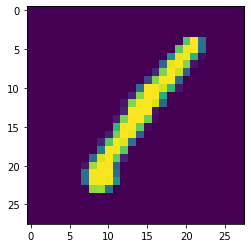

In [8]:
plt.imshow(train_images[0][:,:,0])
print('The Number is : '+ str(labels[0]))

In [0]:
#normalize image
train_images = train_images/255
test_images = test_images/255

In [10]:
#transform label in to one_hot code
labels = to_categorical(labels)
print(labels.shape)
print(labels[:10])

(42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [0]:
#split dataset into training and validation dataset
x_train, x_val, y_train, y_val = train_test_split(train_images, labels, test_size = 0.2)

In [12]:
model = tf.keras.models.Sequential([Conv2D(64, (3,3), strides = 1, padding = 'same',
                                          activation = 'relu', input_shape = (28, 28, 1)),
                                   BatchNormalization(),
                                   MaxPooling2D((2,2)),
                                   Conv2D(128, (3,3), strides = 1, padding = 'same',
                                          activation = 'relu'),
                                   BatchNormalization(),
                                   MaxPooling2D(2,2),
                                   Conv2D(256, (3,3), strides = 1, padding = 'same',
                                          activation = 'relu'),
                                   BatchNormalization(),
                                   MaxPooling2D(2,2),
                                   Flatten(),
                                   Dropout(0.25),
                                   Dense(units = 512, kernel_regularizer = regularizers.l2(0.1)),
                                   BatchNormalization(),
                                   Activation('relu'),
                                   Dropout(0.25),
                                   Dense(units = 256, kernel_regularizer = regularizers.l2(0.1)),
                                   BatchNormalization(),
                                   Activation('relu'),
                                   Dropout(0.25),
                                   Dense(units = 10, activation = 'softmax')])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         2

In [0]:
#reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              patience = 5, 
                              verbose = 1, 
                              factor = 0.033,
                              min_lr = 0.000001)

In [14]:
#training
epochs = 50
batch = 512

history = model.fit(x_train, y_train, 
                    verbose = 1,
                    batch_size = batch,
                    epochs = epochs,
                    validation_data = (x_val, y_val),
                    callbacks = [reduce_lr])

Epoch 1/50
66/66 [==============================] - 6s 96ms/step - loss: 30.2856 - accuracy: 0.9110 - val_loss: 4.5997 - val_accuracy: 0.1160 - lr: 0.0010
Epoch 2/50
66/66 [==============================] - 5s 82ms/step - loss: 0.9323 - accuracy: 0.9755 - val_loss: 2.5969 - val_accuracy: 0.1720 - lr: 0.0010
Epoch 3/50
66/66 [==============================] - 5s 81ms/step - loss: 0.3781 - accuracy: 0.9771 - val_loss: 2.3900 - val_accuracy: 0.2298 - lr: 0.0010
Epoch 4/50
66/66 [==============================] - 5s 82ms/step - loss: 0.3475 - accuracy: 0.9790 - val_loss: 2.1166 - val_accuracy: 0.3033 - lr: 0.0010
Epoch 5/50
66/66 [==============================] - 5s 82ms/step - loss: 0.3215 - accuracy: 0.9811 - val_loss: 2.0622 - val_accuracy: 0.3074 - lr: 0.0010
Epoch 6/50
66/66 [==============================] - 5s 82ms/step - loss: 0.3260 - accuracy: 0.9820 - val_loss: 1.5139 - val_accuracy: 0.5099 - lr: 0.0010
Epoch 7/50
66/66 [==============================] - 5s 82ms/step - loss: 0.

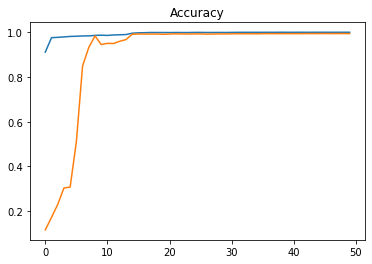

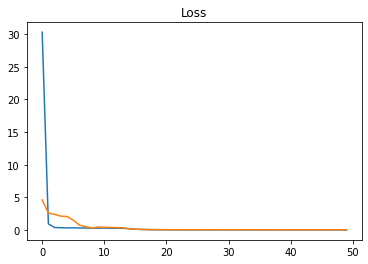

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

# Fruit Classification

Convoluational neural network can be applied in more complicated images classification such as 3-channel images(RGB) with complex texture.

In [0]:
train_folder_path = '/content/drive/My Drive/fruit/train'
test_folder_path = '/content/drive/My Drive/fruit/test'

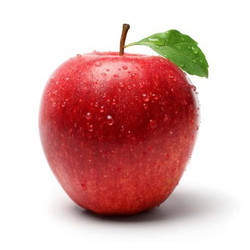

In [17]:
image = '/content/drive/My Drive/fruit/train/apple/apple_2.jpg'

img = cv2.imread(image, cv2.IMREAD_COLOR)
cv2_imshow(img)

In [18]:
images = []
labels = []

for class_folder in os.listdir(train_folder_path):
  class_folder_path = os.path.join(train_folder_path, class_folder)
  for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (100, 100))

    images.append(img)
    labels.append(class_folder)

images = np.array(images)
labels = np.array(labels).reshape(-1, 1)

print(images.shape)
print(labels.shape)


(220, 100, 100, 3)
(220, 1)


In [19]:
test_images = []
test_labels = []

for class_folder in os.listdir(test_folder_path):
  class_folder_path = os.path.join(test_folder_path, class_folder)
  for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (100, 100))

    test_images.append(img)
    test_labels.append(class_folder)

test_images = np.array(test_images)
test_labels = np.array(test_labels).reshape(-1, 1)

print(test_images.shape)
print(test_labels.shape)


(55, 100, 100, 3)
(55, 1)


In [0]:
images = images/255
test_images = test_images/255

In [21]:
le = LabelEncoder()
ohe = OneHotEncoder(categories='auto')

num_labels = le.fit_transform(labels)
oh_labels = ohe.fit_transform(num_labels.reshape(-1, 1)).toarray()

num_test_labels = le.transform(test_labels)
oh_test_labels = ohe.transform(num_test_labels.reshape(-1, 1)).toarray()

print(oh_labels.shape)
print(oh_test_labels.shape)

(220, 3)
(55, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              petience = 5,
                              min_lr = 0.000001,
                              verbose = 1,
                              factor = 0.033)

In [34]:
model = Sequential()

model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_regularizer = regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_27 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
batch_normalization_28 (Batc (None, 50, 50, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 128)      

In [35]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), strides = 1, padding = 'same',
                                                           activation = 'relu', input_shape = (100, 100, 3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Conv2D(128, (3,3), strides =1, padding = 'same',
                                                           activation = 'relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Conv2D(256, (3,3), strides = 1, padding = 'same',
                                                           activation = 'relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, kernel_regularizer = regularizers.l2(0.1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(0.1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(3, activation = 'softmax')])

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_32 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
batch_normalization_33 (Batc (None, 50, 50, 128)       512       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 128)     

In [36]:
epochs = 100

history = model.fit(images, oh_labels,
                    batch_size = batch,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = [reduce_lr],
                    validation_data = (test_images, oh_test_labels))

Epoch 1/100
1/1 [==============================] - 1s 681ms/step - loss: 35.8866 - acc: 0.3136 - val_loss: 34.2545 - val_acc: 0.4545 - lr: 0.0010
Epoch 2/100
1/1 [==============================] - 0s 77ms/step - loss: 33.9179 - acc: 0.7455 - val_loss: 33.2321 - val_acc: 0.5273 - lr: 0.0010
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 32.5123 - acc: 0.8455 - val_loss: 32.1579 - val_acc: 0.6182 - lr: 0.0010
Epoch 4/100
1/1 [==============================] - 0s 76ms/step - loss: 31.3496 - acc: 0.9000 - val_loss: 31.0673 - val_acc: 0.4545 - lr: 0.0010
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 30.2842 - acc: 0.9091 - val_loss: 30.0332 - val_acc: 0.3455 - lr: 0.0010
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 29.2001 - acc: 0.9636 - val_loss: 29.0340 - val_acc: 0.4182 - lr: 0.0010
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 28.1860 - acc: 0.9591 - val_loss: 28.0451 - val_acc: 0.52

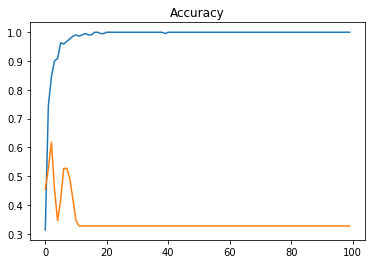

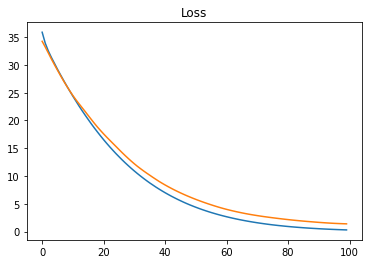

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()